In [11]:
import numpy as np
import pandas as pd
from scipy.stats import probplot
from scipy.stats import ttest_ind
from scipy.stats import normaltest
from scipy.stats import levene
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("hw_bootstrap.csv", sep=";").drop(columns=["Unnamed: 0"])

In [13]:
df.head()

,value,experimentVariant
0,9.773113,Treatment
1,9.311246,Treatment
2,11.172828,Treatment
3,11.624510,Treatment
4,10.462331,Treatment


<AxesSubplot:xlabel='experimentVariant', ylabel='Count'>

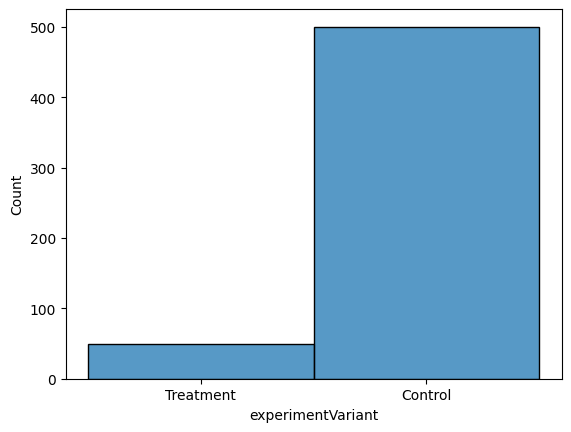

In [14]:
sns.histplot(df["experimentVariant"])

<AxesSubplot:xlabel='experimentVariant', ylabel='value'>

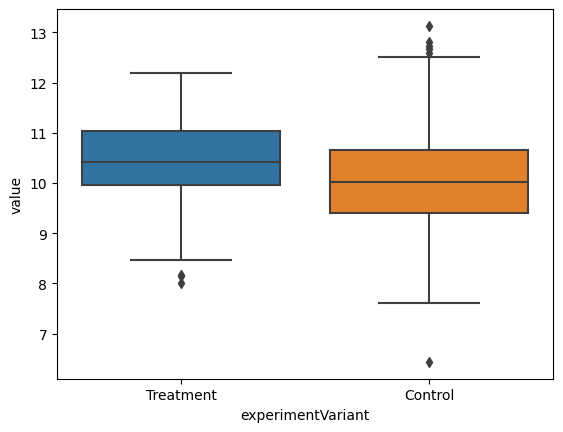

In [15]:
sns.boxplot(x="experimentVariant", y="value", data=df)

In [16]:
test_group = df["value"].loc[df["experimentVariant"] == "Treatment"]
control_group = df["value"].loc[df["experimentVariant"] == "Control"]

In [17]:
print("Среднее тестовой группы:", test_group.mean())
print("Среднее контрольной группы:", control_group.mean())

Среднее тестовой группы: 10.367236377039061
Среднее контрольной группы: 10.026866533804297


In [18]:
print("Медиана тестовой группы:", test_group.median())
print("Медиана контрольной группы:", control_group.median())

Медиана тестовой группы: 10.420193170770151
Медиана контрольной группы: 10.0184651909296


<AxesSubplot:xlabel='value', ylabel='Count'>

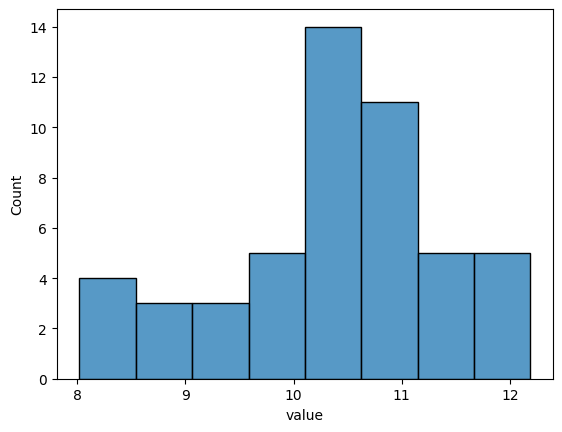

In [19]:
#распределение тестовой группы
sns.histplot(test_group.round(2))

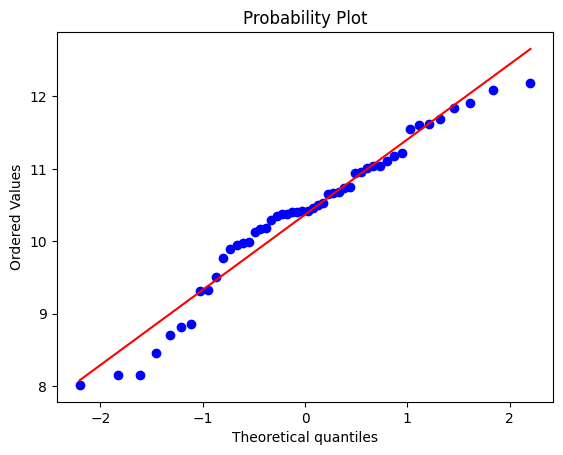

In [34]:
probplot(test_group, plot=sns.mpl.pyplot)
plt.show()

In [21]:
#проверка на нормальность распределения тестовой группы - распределение нормально
normaltest(test_group)

NormaltestResult(statistic=2.667697464747914, pvalue=0.263461315408084)

<AxesSubplot:xlabel='value', ylabel='Count'>

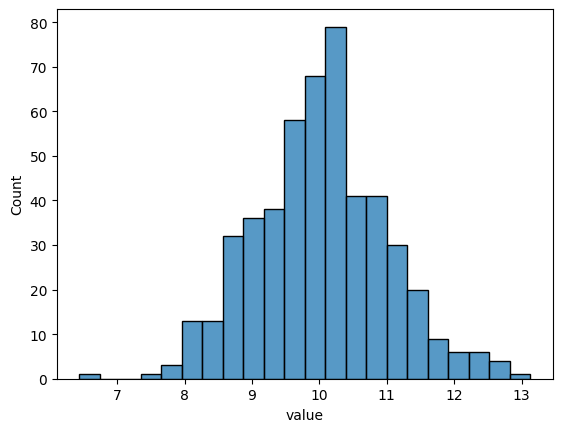

In [22]:
#распределение контрольной группы
sns.histplot(control_group.round(2))

((array([-2.99209858e+00, -2.71015927e+00, -2.55162541e+00, -2.43921385e+00,
         -2.35113311e+00, -2.27822091e+00, -2.21572267e+00, -2.16084152e+00,
         -2.11178767e+00, -2.06734403e+00, -2.02664403e+00, -1.98904794e+00,
         -1.95406954e+00, -1.92133033e+00, -1.89052965e+00, -1.86142459e+00,
         -1.83381593e+00, -1.80753820e+00, -1.78245240e+00, -1.75844061e+00,
         -1.73540186e+00, -1.71324904e+00, -1.69190643e+00, -1.67130780e+00,
         -1.65139483e+00, -1.63211595e+00, -1.61342528e+00, -1.59528183e+00,
         -1.57764883e+00, -1.56049314e+00, -1.54378481e+00, -1.52749667e+00,
         -1.51160399e+00, -1.49608418e+00, -1.48091659e+00, -1.46608224e+00,
         -1.45156367e+00, -1.43734479e+00, -1.42341071e+00, -1.40974764e+00,
         -1.39634279e+00, -1.38318426e+00, -1.37026095e+00, -1.35756253e+00,
         -1.34507932e+00, -1.33280226e+00, -1.32072287e+00, -1.30883317e+00,
         -1.29712567e+00, -1.28559331e+00, -1.27422944e+00, -1.26302778e+00,

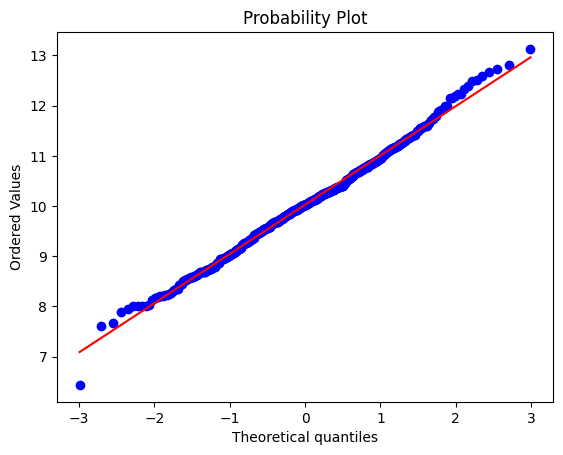

In [23]:
probplot(control_group, plot=sns.mpl.pyplot)

In [15]:
#проверка на нормальность распределения контрольной группы - распределение нормально
normaltest(control_group)

NormaltestResult(statistic=2.943458720256407, pvalue=0.2295282048395919)

In [19]:
print("Дисперсия тестовой группы:", test_group.var())
print("Дисперсия контрольной группы:", control_group.var())

Дисперсия тестовой группы: 1.0627947219201967
Дисперсия контрольной группы: 0.9591800678643451


In [21]:
#тест Левене - дисперсия одинакова
levene(test_group, control_group)

LeveneResult(statistic=0.0026847386798669634, pvalue=0.9586954117509325)

In [22]:
#T-тест - значимые различия в среднем есть
ttest_ind(test_group, control_group)

Ttest_indResult(statistic=2.331858965573001, pvalue=0.020069539127355422)

In [86]:
def get_bootstrap(
    data_column_1,
    data_column_2,
    iter_count = 10000,
    statistic = np.mean,
    conf_level = 0.95
):
    boot_len = max(data_column_1.size, data_column_2.size)
    boot_data = []
    for i in range(iter_count):
        subsample_1 = np.random.choice(data_column_1, size=boot_len)
        subsample_2 = np.random.choice(data_column_2, size=boot_len)
        
        boot_data.append(statistic(subsample_1 - subsample_2))
    
    quantile_right = np.quantile(boot_data, conf_level)
    quantile_left = np.quantile(boot_data, 1 - conf_level)
    
    
    _, _, bars = plt.hist(boot_data, bins = 50)
    for bar in bars:
        if abs(bar.get_x()) <= quantile_left or abs(bar.get_x()) >= quantile_right:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines([quantile_left, quantile_right], ymin=0, ymax=500, linestyle='--', color="blue")
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
    
    return {"quantile_left": quantile_left, "quantile_right": quantile_right}

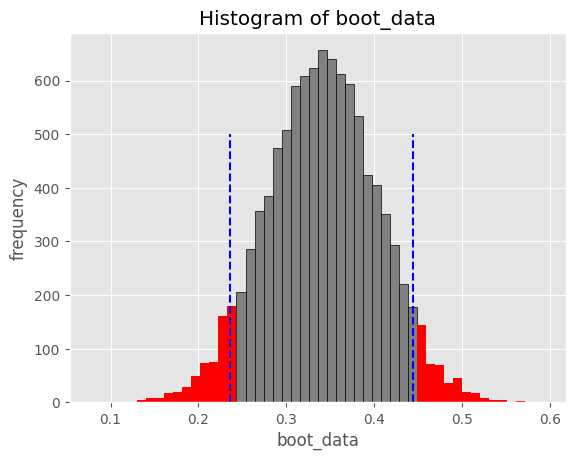

{'quantile_left': 0.23621640904408137, 'quantile_right': 0.44369880998822}

In [87]:
#0 не входит в доверительный интервал, поэтому статистически значимая разница в среднем есть
get_bootstrap(test_group, control_group)

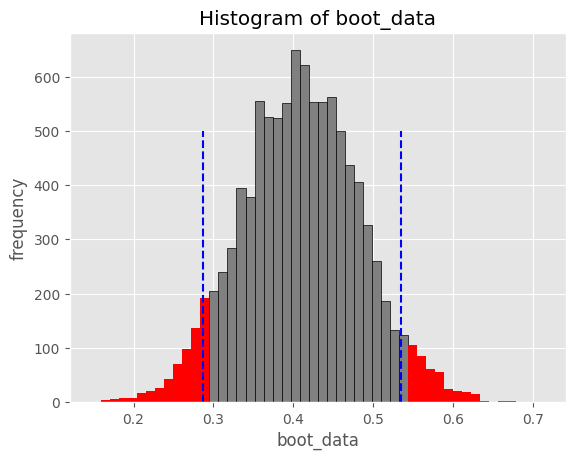

{'quantile_left': 0.28723888009873455, 'quantile_right': 0.534129362208302}

In [88]:
#0 не входит в доверительный интервал, поэтому статистически значимая разница в медиане есть
get_bootstrap(test_group, control_group, statistic=np.median)